# Loan Prediction

In [56]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [57]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [58]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1vGch8NmAj3ICShbgM7ClinP7Xofu7xyT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('loan.csv') 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [60]:
data = pd.read_csv("loan.csv")
data.shape

(614, 13)

In [61]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
data.drop('Loan_ID',axis='columns',inplace=True)

In [63]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


** Data Cleaning and filling missing values **

In [65]:
data.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [67]:
data.Gender = data.Gender.fillna('Male')

In [68]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [69]:
data.Married = data.Married.fillna('Yes')

In [70]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [71]:
data.Dependents = data.Dependents.fillna('0')

In [72]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [73]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [74]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [75]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [76]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [77]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [78]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [79]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [80]:
data.shape

(614, 12)

In [81]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Unique values

In [82]:
def print_unique_col_values(data):
       for column in data:
            if data[column].dtypes=='object':
                print(f'{column}: {data[column].unique()}') 

In [83]:
print_unique_col_values(data)

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


## OHE for categorical features

In [84]:
df_new = pd.get_dummies(data=data, columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
df_new.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

## Convert Loan_status to 0 amd 1

In [85]:
y_n_col = ['Loan_Status']
for col in y_n_col:
    df_new[col].replace({'Y': 1,'N': 0},inplace=True)

In [86]:
df_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [87]:
df_new.shape

(614, 21)

## Scale 

In [88]:
col_scale = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new[col_scale] = scaler.fit_transform(df_new[col_scale])

In [89]:
df_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.198860,0.74359,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [90]:
#df_new.info()

# X and y

In [91]:
#x_columns = df_new.columns.drop('Loan_Status')
#X = df_new[x_columns].values
#y = df_new['Loan_Status'].values

In [92]:
X = df_new.drop('Loan_Status',axis='columns')
y = df_new['Loan_Status']

In [93]:
# If using softmax
y = to_categorical(y)
y.shape

(614, 2)

In [94]:
y[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Train test split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [96]:
print(X_train.shape)
print(X_test.shape)

(491, 20)
(123, 20)


# Build DNN model

In [97]:
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation='softmax'))

# Model Summary

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               2100      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 2)                 102       
                                                                 
Total params: 17,352
Trainable params: 17,352
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [99]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model

In [100]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6624 - accuracy: 0.6273
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6011 - accuracy: 0.6904
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5787 - accuracy: 0.6965
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5382 - accuracy: 0.7699
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.7984
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.7984
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8147
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.8147
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8147
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4284 - accuracy: 0.8167
Epoch 11/

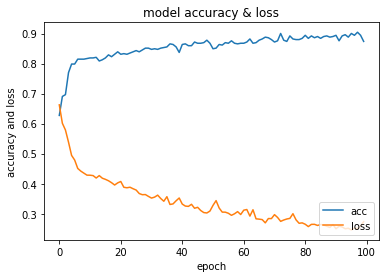

In [101]:
#Visualize the models accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

##Calculate prediction

In [102]:
y_pred = model.predict(X_test)

In [103]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.9288 - accuracy: 0.7480


[0.9287707209587097, 0.7479674816131592]

## Confusion matrix
* Converting predictions to label

In [104]:
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [105]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(pred,test))

[[18  9]
 [22 74]]


In [106]:
rep = classification_report(test, pred) 
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       0.67      0.45      0.54        40
           1       0.77      0.89      0.83        83

    accuracy                           0.75       123
   macro avg       0.72      0.67      0.68       123
weighted avg       0.74      0.75      0.73       123

